<a href="https://colab.research.google.com/github/sandhrabijoy/firsttime/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

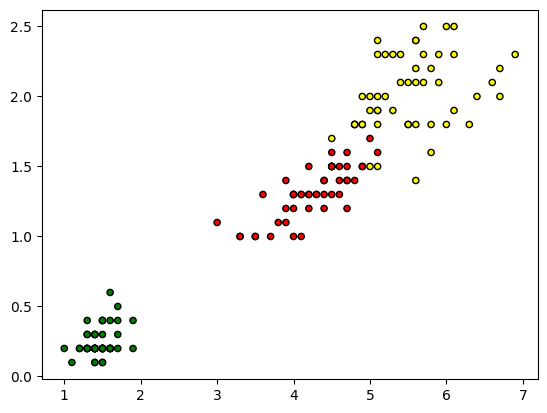

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [1]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report

def euc_dist(x1, x2):
  dist = np.sqrt(np.sum((x1-x2)**2))
  return dist

class KNN:
  def __init__(self, k ):
    self.k = k


  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    #compute the distances
    distances = [euc_dist(x, x_train) for x_train in self.X_train]
    #get the closest k
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    #majority voye
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]

colors = ["green","red","yellow"]
cmap = ListedColormap(colors)

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234)

plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap,edgecolor='k', s=20)
plt.show()

clf = KNN(5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

